In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

athletes_df = pd.read_csv('data_files/athlete_events.csv')
regions_df = pd.read_csv('data_files/noc_regions.csv')
data = pd.merge(athletes_df, regions_df, how='left', on='NOC')
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [32]:
# Determine which columns have null values 
athletes_df.isna().any()

ID        False
Name      False
Sex       False
Age        True
Height     True
Weight     True
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal      True
dtype: bool

In [33]:
# Cleaning up DataFrame
data.drop(['Team', 'NOC', 'Games', 'City', 'Event', 'notes'], axis=1, inplace=True)
data.rename(columns = {'region':'Country'}, inplace = True)

# Replace null values
data['Medal'].fillna('None', inplace = True)
data['Height'].fillna(0, inplace = True)
data['Weight'].fillna(0, inplace = True)
data['Age'].fillna(0, inplace = True)
# data['BMI'] = data['Weight'] / (data['Height'] * data['Height'])
data = data.drop_duplicates()
print(len(data))
data.head()

199161


,ID,Name,Sex,Age,Height,Weight,Year,Season,Sport,Medal,Country
0,1,A Dijiang,M,24.0,180.0,80.0,1992,Summer,Basketball,None,China
1,2,A Lamusi,M,23.0,170.0,60.0,2012,Summer,Judo,None,China
2,3,Gunnar Nielsen Aaby,M,24.0,0.0,0.0,1920,Summer,Football,None,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,0.0,0.0,1900,Summer,Tug-Of-War,Gold,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,1988,Winter,Speed Skating,None,Netherlands


In [34]:
# Verify object types
data.dtypes

ID           int64
Name        object
Sex         object
Age        float64
Height     float64
Weight     float64
Year         int64
Season      object
Sport       object
Medal       object
Country     object
dtype: object

In [35]:
# Create winner's dataframe
winners_df = data.loc[data["Medal"] != "None"]
print(len(winners_df))
winners_df.head()

37627


,ID,Name,Sex,Age,Height,Weight,Year,Season,Sport,Medal,Country
3,4,Edgar Lindenau Aabye,M,34.0,0.0,0.0,1900,Summer,Tug-Of-War,Gold,Denmark
37,15,Arvo Ossian Aaltonen,M,30.0,0.0,0.0,1920,Summer,Swimming,Bronze,Finland
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,2014,Winter,Ice Hockey,Bronze,Finland
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,1948,Summer,Gymnastics,Bronze,Finland
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,1948,Summer,Gymnastics,Gold,Finland


In [36]:
# Create dataframe with winners who only have an age value
ages_winners_df = winners_df[winners_df["Age"] != 0]
print(len(ages_winners_df))
ages_winners_df.head()


36927


,ID,Name,Sex,Age,Height,Weight,Year,Season,Sport,Medal,Country
3,4,Edgar Lindenau Aabye,M,34.0,0.0,0.0,1900,Summer,Tug-Of-War,Gold,Denmark
37,15,Arvo Ossian Aaltonen,M,30.0,0.0,0.0,1920,Summer,Swimming,Bronze,Finland
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,2014,Winter,Ice Hockey,Bronze,Finland
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,1948,Summer,Gymnastics,Bronze,Finland
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,1948,Summer,Gymnastics,Gold,Finland


In [37]:
ages_winners_df.describe()

,ID,Age,Height,Weight,Year
count,36927.000000,36927.000000,36927.000000,36927.000000,36927.000000
mean,69356.098221,25.961383,141.487448,57.857972,1975.503182
std,38849.357676,5.870562,72.217774,33.378169,32.752037
min,4.000000,10.000000,0.000000,0.000000,1896.000000
25%,36512.000000,22.000000,161.000000,51.000000,1956.000000
50%,68934.000000,25.000000,174.000000,68.000000,1984.000000
75%,103417.000000,29.000000,183.000000,80.000000,2002.000000
max,135563.000000,73.000000,223.000000,182.000000,2016.000000


C:\Users\mfarm\Anaconda3\envs\PythonData2\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\mfarm\Anaconda3\envs\PythonData2\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\mfarm\Anaconda3\envs\PythonData2\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


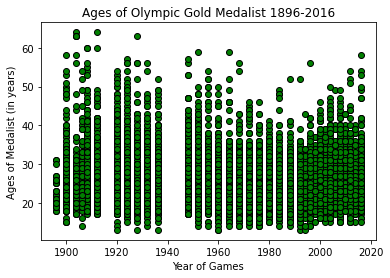

In [38]:
# Look at only gold medalist
ages_gold_df = ages_winners_df[winners_df["Medal"] == "Gold"]
ages_silver_df = ages_winners_df[winners_df["Medal"] == "Silver"]
ages_bronze_df = ages_winners_df[winners_df["Medal"] == "Bronze"]

# Create scatter plot to look at ages of Gold medal winners over the years
plt.title("Ages of Olympic Gold Medalist 1896-2016")
plt.xlabel("Year of Games")
plt.ylabel("Ages of Medalist (in years)")
plt.scatter(ages_gold_df["Year"], ages_gold_df["Age"], marker ="o", facecolors="green", edgecolors="black")
plt.show()

In [10]:
ages_gold_df = ages_winners_df[winners_df["Medal"] == "Gold"]
ages_silver_df = ages_winners_df[winners_df["Medal"] == "Silver"]
ages_bronze_df = ages_winners_df[winners_df["Medal"] == "Bronze"]
ages_gold_df["Year"], ages_gold_df["Age"]

yearBin = [10,24,34,44,54]
goldAge = ages_gold_df['Age'].value_counts(bins=yearBin)
silverAge = ages_silver_df['Age'].value_counts(bins=yearBin)
bronzeAge = ages_bronze_df['Age'].value_counts(bins=yearBin)

#### Working in progress...




C:\Users\mfarm\Anaconda3\envs\PythonData2\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\mfarm\Anaconda3\envs\PythonData2\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\mfarm\Anaconda3\envs\PythonData2\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


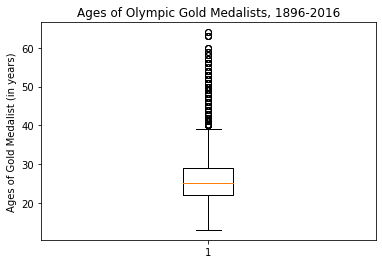

In [23]:
goldenAge = ages_gold_df['Age']
fig1, ax1 = plt.subplots()
ax1.set_title('Ages of Olympic Gold Medalists, 1896-2016')
ax1.set_ylabel('Ages of Gold Medalist (in years)')
ax1.boxplot(goldenAge)
plt.show()

In [9]:
# Create dataframes for winners by olympic season
summer_winners = winners_df.loc[winners_df["Season"] == "Summer"]
winter_winners = winners_df.loc[winners_df["Season"] == "Winter"]

In [40]:
# Create summer winners dataframe grouped by country and medal
summer_medals = summer_winners.groupby(["Country","Medal"]).size().unstack(fill_value=0).reset_index().rename_axis(None, axis=1)
total_summer = summer_medals["Bronze"] + summer_medals["Silver"] + summer_medals["Gold"]
summer_medals["Total"] = total_summer
summer_sorted = summer_medals.sort_values(by="Total", ascending=False).reset_index()
top_summer = summer_sorted.head(25)
top_summer



,index,Country,Bronze,Gold,Silver,Total
0,123,USA,1145,2105,1263,4513
1,98,Russia,959,1116,916,2991
2,41,Germany,1020,990,947,2957
3,122,UK,598,596,704,1898
4,38,France,563,424,532,1519
5,57,Italy,447,474,459,1380
6,4,Australia,493,327,429,1249
7,48,Hungary,352,397,312,1061
8,110,Sweden,345,334,381,1060
9,82,Netherlands,357,231,293,881


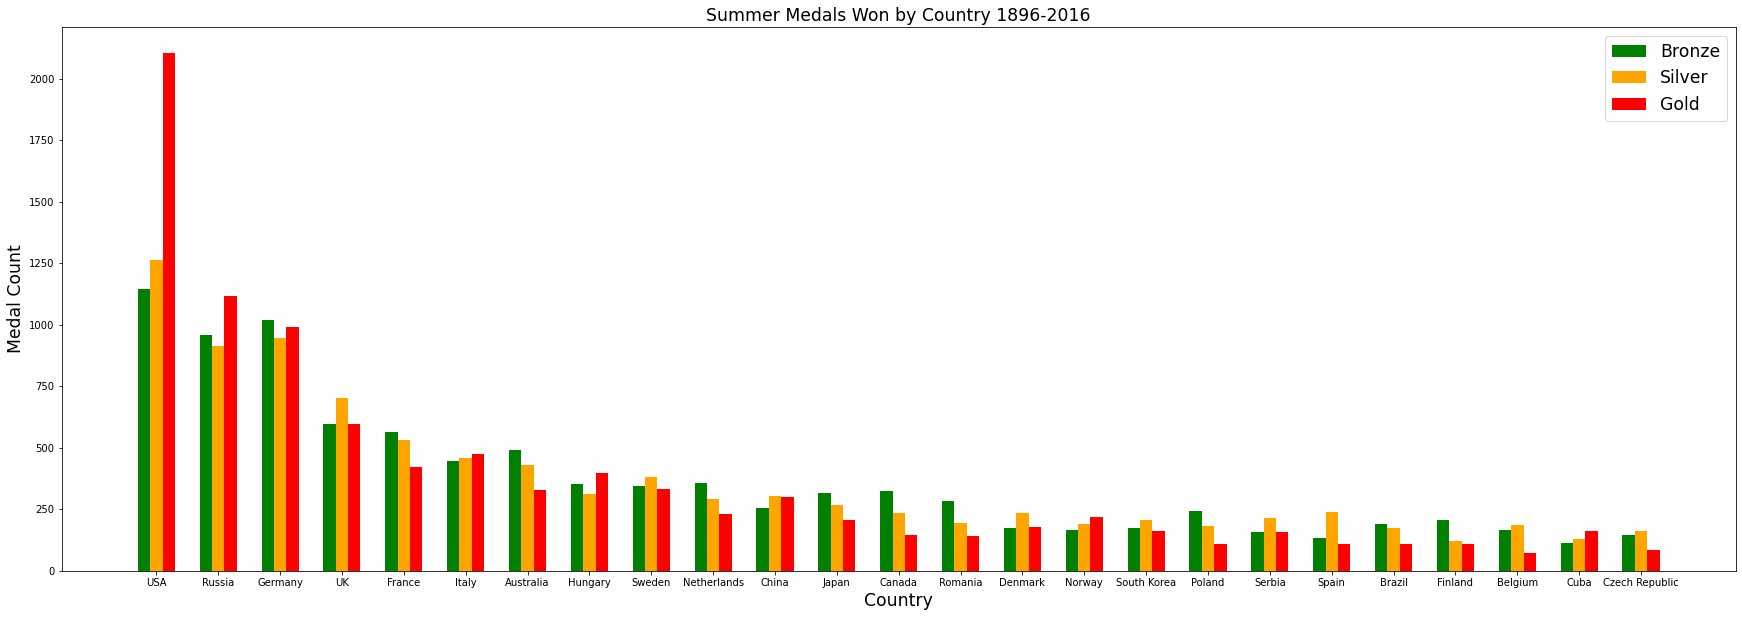

In [41]:
# Create bar chart for top summer medal winners
x_axis = np.arange(len(top_summer["Country"]))

plt.figure(figsize=(30,10))
plt.bar(x_axis -.2, top_summer["Bronze"], 0.2, label = "Bronze", color="green")
plt.bar(x_axis +.0, top_summer["Silver"], 0.2, label = "Silver", color="orange")
plt.bar(x_axis +.2, top_summer["Gold"], 0.2, label = "Gold", color="red")
plt.xticks(x_axis,top_summer["Country"])
plt.xlabel("Country", fontsize="xx-large")
plt.ylabel("Medal Count", fontsize="xx-large")
plt.title("Summer Medals Won by Country 1896-2016", fontsize="xx-large")
plt.legend(loc="upper right",fontsize="xx-large")
plt.show()

In [42]:
# Create winter winners dataframe grouped by country and medal
winter_medals = winter_winners.groupby(["Country","Medal"]).size().unstack(fill_value=0).reset_index().rename_axis(None, axis=1)
total_winter = winter_medals["Bronze"] + winter_medals["Silver"] + winter_medals["Gold"]
winter_medals["Total"] = total_winter
winter_sorted = winter_medals.sort_values(by="Total", ascending=False).reset_index()
top_winter = winter_sorted.head(25)
top_winter

,index,Country,Bronze,Gold,Silver,Total
0,29,Russia,170,346,183,699
1,38,USA,154,157,300,611
2,5,Canada,104,301,190,595
3,13,Germany,191,197,185,573
4,35,Sweden,171,115,123,409
5,26,Norway,119,123,154,396
6,11,Finland,207,55,134,396
7,36,Switzerland,124,71,68,263
8,1,Austria,93,71,93,257
9,8,Czech Republic,108,28,90,226


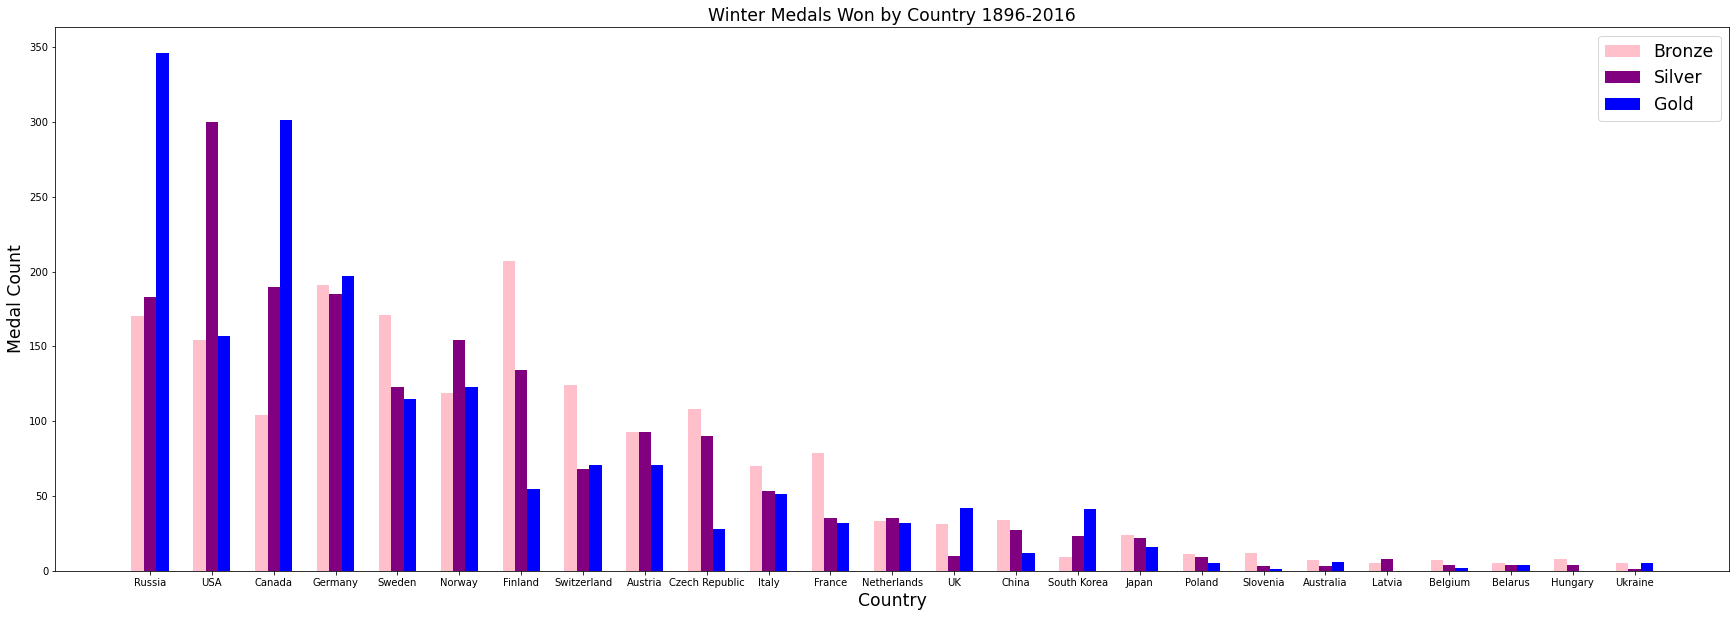

In [43]:
# Create bar chart for top winter medal winners
x_axis = np.arange(len(top_winter["Country"]))

plt.figure(figsize=(30,10))
plt.bar(x_axis -.2, top_winter["Bronze"], 0.2, label = "Bronze", color="pink")
plt.bar(x_axis +.0, top_winter["Silver"], 0.2, label = "Silver", color="purple")
plt.bar(x_axis +.2, top_winter["Gold"], 0.2, label = "Gold", color="blue")
plt.xticks(x_axis,top_winter["Country"])
plt.xlabel("Country", fontsize="xx-large")
plt.ylabel("Medal Count", fontsize="xx-large")
plt.title("Winter Medals Won by Country 1896-2016", fontsize="xx-large")
plt.legend(loc="upper right",fontsize="xx-large")
plt.show()

In [44]:
summerGames_df = data[data['Season']=='Summer']
winterGames_df = data[data['Season']== 'Winter']
summerGames_df.head()

,ID,Name,Sex,Age,Height,Weight,Year,Season,Sport,Medal,Country
0,1,A Dijiang,M,24.0,180.0,80.0,1992,Summer,Basketball,None,China
1,2,A Lamusi,M,23.0,170.0,60.0,2012,Summer,Judo,None,China
2,3,Gunnar Nielsen Aaby,M,24.0,0.0,0.0,1920,Summer,Football,None,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,0.0,0.0,1900,Summer,Tug-Of-War,Gold,Denmark
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,0.0,1932,Summer,Athletics,None,Netherlands


In [45]:
summerGames_df.describe()

,ID,Age,Height,Weight,Year
count,168009.000000,168009.000000,168009.000000,168009.000000,168009.000000
mean,67793.055955,24.878376,138.615056,56.248975,1978.274247
std,39193.378553,8.041598,73.315820,32.889814,30.769730
min,1.000000,0.000000,0.000000,0.000000,1896.000000
25%,33656.000000,21.000000,159.000000,50.000000,1960.000000
50%,68073.000000,25.000000,173.000000,66.000000,1988.000000
75%,101683.000000,28.000000,182.000000,78.000000,2004.000000
max,135568.000000,97.000000,226.000000,214.000000,2016.000000


In [46]:
winterGames_df.describe()

,ID,Age,Height,Weight,Year
count,31152.000000,31152.000000,31152.000000,31152.000000,31152.000000
mean,69548.031844,24.997592,143.700212,57.900135,1986.459425
std,38408.526385,5.337527,67.548175,30.864058,23.160558
min,5.000000,0.000000,0.000000,0.000000,1924.000000
25%,37519.000000,22.000000,162.000000,54.000000,1972.000000
50%,68273.000000,25.000000,173.000000,67.000000,1992.000000
75%,103246.000000,28.000000,180.000000,78.000000,2006.000000
max,135571.000000,58.000000,211.000000,145.000000,2014.000000


Text(0.5, 1.0, 'Countries at the Summer Olympics')

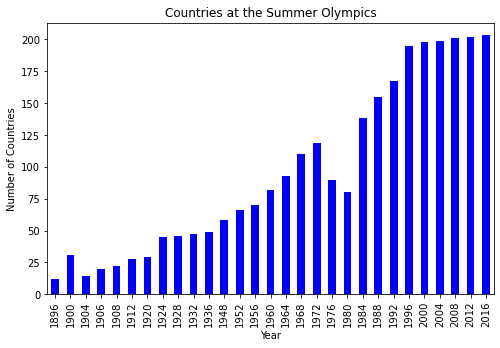

In [47]:
# Number of countries participated the Olympics (Many countries boycotted the 1980 olympics)
plt.figure(figsize=(8,5))
summerGames_df.groupby('Year')['Country'].nunique().plot(kind='bar',color='blue')
plt.xticks(rotation = 90)
plt.ylabel("Number of Countries")
plt.title("Countries at the Summer Olympics")

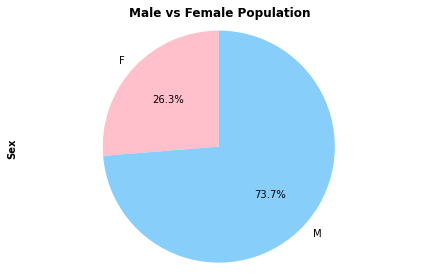

In [48]:
# Generate a pie plot showing the population of female versus male
sex = data.groupby("Sex")["Sex"].count()
colors = ["pink", "lightskyblue"]
sex_data = sex.plot(kind="pie", colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis("equal")
sex_data.set_title(label= "Male vs Female Population", fontweight = "bold")
sex_data.set_ylabel("Sex", fontweight = "bold")
plt.tight_layout()
# sex_data.figure.savefig("Images/piecharts_pandas.png")
plt.show()
plt.close()

In [49]:
# (May be) Generate a pie plot showing above in early days vs recent years

Text(0.5, 1.0, 'Athletes at the Olympic Games')

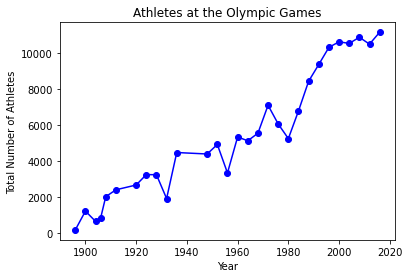

In [50]:
plt.figure
summerGames_df.groupby('Year')['ID'].nunique().plot(color='blue',marker='o')
plt.ylabel("Total Number of Athletes")
plt.title("Athletes at the Olympic Games")

Text(0.5, 1.0, 'Athletes at the Olympic Games by Sex')

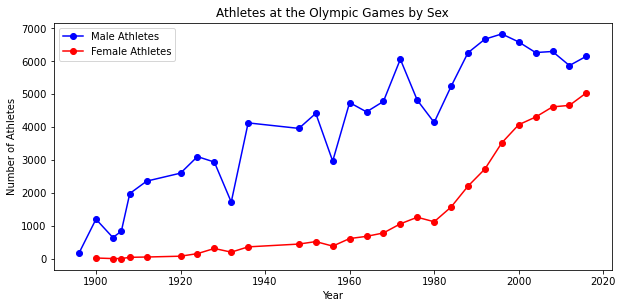

In [51]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,2)
summerGames_df.loc[summerGames_df['Sex']=='M'].groupby('Year')['ID'].nunique().plot(color='b',marker='o',label='Male Athletes')
summerGames_df.loc[summerGames_df['Sex']=='F'].groupby('Year')['ID'].nunique().plot(color='r',marker='o',label='Female Athletes')
plt.ylabel("Number of Athletes")
plt.legend(loc='upper left')
plt.title("Athletes at the Olympic Games by Sex")

In [128]:
# Group summer winners by year and create total medals column
yearly_summer = summer_winners.groupby(["Year","Country","Medal"]).size().unstack(fill_value=0).reset_index().rename_axis(None, axis=1)
total_summer = yearly_summer["Bronze"] + yearly_summer["Silver"] + yearly_summer["Gold"]
yearly_summer["Total Medals"] = total_summer
summer_total = yearly_summer[["Year", "Country","Total Medals"]]
summer_total



,Year,Country,Total Medals
0,1896,Australia,2
1,1896,Austria,4
2,1896,Denmark,6
3,1896,France,9
4,1896,Germany,18
...,...,...,...
1259,2016,Ukraine,15
1260,2016,United Arab Emirates,1
1261,2016,Uzbekistan,13
1262,2016,Venezuela,3


In [129]:
# Look at summer medal count for the US compared to the rest of the world
# pull out total medal count for USA and rest of the world and then combine back into new dataframe
usa_summer = summer_total.loc[summer_total["Country"] == "USA"].groupby(["Year"])["Total Medals"].sum().reset_index()
other_summer = summer_total.loc[summer_total["Country"] != "USA"].groupby(["Year"])["Total Medals"].sum().reset_index()
summer_medal_count = pd.merge(other_summer, usa_summer, how='left', on='Year')

# Preview merged results
summer_medal_count


,Year,Total Medals_x,Total Medals_y
0,1896,100,16.0
1,1900,486,50.0
2,1904,82,341.0
3,1906,393,19.0
4,1908,739,61.0
5,1912,792,95.0
6,1920,1021,159.0
7,1924,614,170.0
8,1928,623,82.0
9,1932,428,180.0


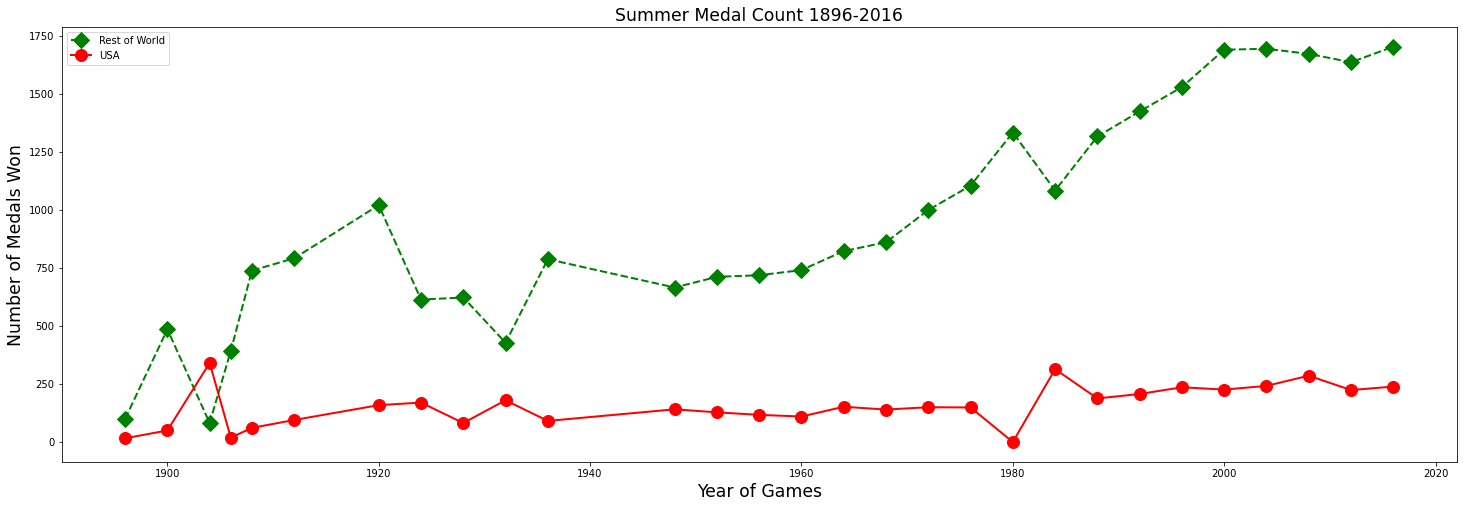

In [130]:
# Rename columns to reflect what is being shown and replace NaN with 0 for USA since there were no summer medals won for USA
summer_medal_count.rename(columns = {"Total Medals_x":"Rest of the World","Total Medals_y": "USA Medals"}, inplace = True)
summer_medal_count["USA Medals"].fillna(0, inplace = True)

# Plot multi-line graph
plt.figure(figsize=(25,8))
plt.plot(summer_medal_count["Year"], summer_medal_count["Rest of the World"], label="Rest of World", color="green", linewidth=2, linestyle="dashed",marker='D',markersize=12,markerfacecolor="g")
plt.plot(summer_medal_count["Year"], summer_medal_count["USA Medals"], label="USA", color="r", linewidth=2,marker='o',markersize=12,markerfacecolor="r")
plt.xlabel("Year of Games",fontsize="xx-large")
plt.ylabel("Number of Medals Won",fontsize="xx-large")
plt.legend(loc="best")
plt.title("Summer Medal Count 1896-2016",fontsize="xx-large")
plt.show()

In [132]:
# Repeat for winter
# Group winter winners by year and create total medals column
yearly_winter = winter_winners.groupby(["Year","Country","Medal"]).size().unstack(fill_value=0).reset_index().rename_axis(None, axis=1)
total_winter = yearly_winter["Bronze"] + yearly_winter["Silver"] + yearly_winter["Gold"]
yearly_winter["Total Medals"] = total_winter
winter_total = yearly_winter[["Year", "Country","Total Medals"]]
winter_total

,Year,Country,Total Medals
0,1924,Australia,1
1,1924,Austria,4
2,1924,Belgium,5
3,1924,Canada,9
4,1924,Finland,13
...,...,...,...
371,2014,Sweden,49
372,2014,Switzerland,29
373,2014,UK,10
374,2014,USA,62


In [134]:
# Look at winter medal count for the US compared to the rest of the world
# pull out total medal count for USA and rest of the world and then combine back into new dataframe
usa_winter = winter_total.loc[winter_total["Country"] == "USA"].groupby(["Year"])["Total Medals"].sum().reset_index()
other_winter = winter_total.loc[winter_total["Country"] != "USA"].groupby(["Year"])["Total Medals"].sum().reset_index()
winter_medal_count = pd.merge(other_winter, usa_winter, how='left', on='Year')

# Preview merged results
winter_medal_count

,Year,Total Medals_x,Total Medals_y
0,1924,112,12
1,1928,74,14
2,1932,57,32
3,1936,87,16
4,1948,116,16
5,1952,98,27
6,1956,113,26
7,1960,116,26
8,1964,165,8
9,1968,182,7


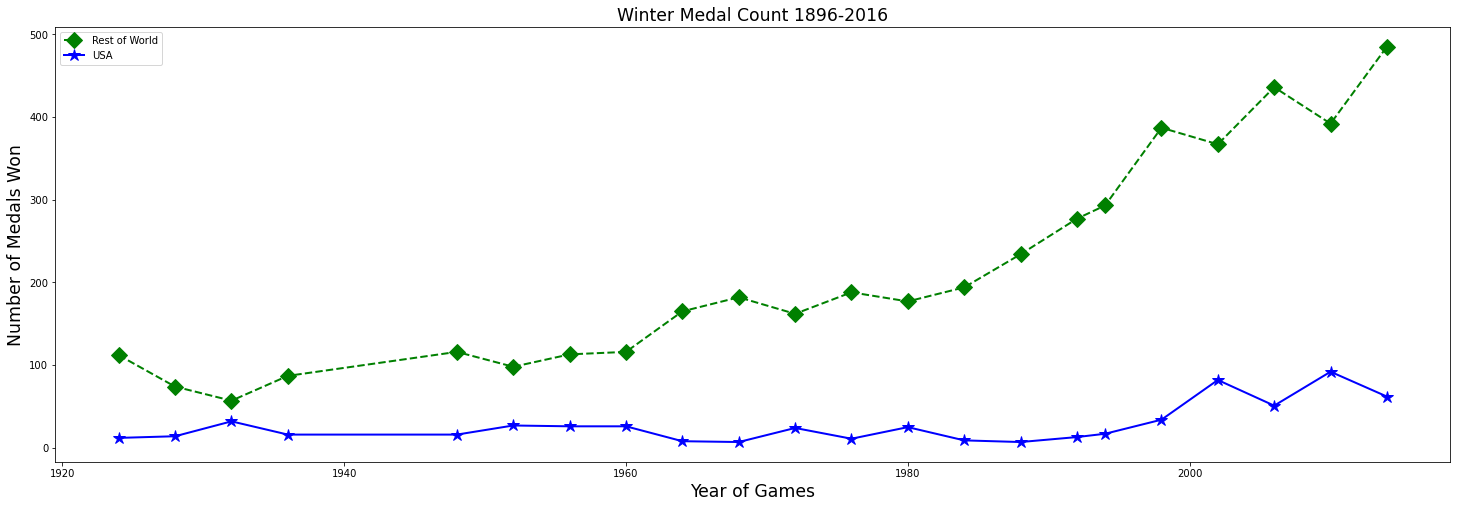

In [136]:
# Rename columns to reflect what is being shown and replace NaN with 0 for USA since there were no winter medals won for USA
winter_medal_count.rename(columns = {"Total Medals_x":"Rest of the World","Total Medals_y": "USA Medals"}, inplace = True)
# Plot multi-line graph
plt.figure(figsize=(25,8))
plt.plot(winter_medal_count["Year"], winter_medal_count["Rest of the World"], label="Rest of World", color="green", linewidth=2, linestyle="dashed",marker='D',markersize=12,markerfacecolor="g")
plt.plot(winter_medal_count["Year"], winter_medal_count["USA Medals"], label="USA", color="b", linewidth=2,marker='*',markersize=12,markerfacecolor="b")
plt.xlabel("Year of Games",fontsize="xx-large")
plt.ylabel("Number of Medals Won",fontsize="xx-large")
plt.legend(loc="best")
plt.title("Winter Medal Count 1896-2016",fontsize="xx-large")
plt.show()